# Preamble

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Importing the Data

In [4]:
fnames = ["world_bank_projects.json", "world_bank_projects_less.json"]
data = pd.read_json(fnames[0])
dles = pd.read_json(fnames[1])

# Questions of Interest
* Find the 10 countries with most projects
* Find the top 10 major project themes (using column 'mjtheme_namecode')
* In the above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Question 1
We begin this problem by identifying what sort of information is at our disposal. To do this, we start by checking the headings of the data frame. 

In [5]:
data.keys()

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

We can easily count the frequencies of the "countryname" column using the `value_counts()` method and taking the first 10 entries. 

In [6]:
numprojects = data.countryname.value_counts()
numprojects[:10]

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

We note that "Africa" isn't a country, and if we choose to discount that, the 10th country in the most projects is the following:

In [7]:
numprojects[10:11]

Islamic Republic of Pakistan    9
Name: countryname, dtype: int64

We can visualize this with a bar chart.

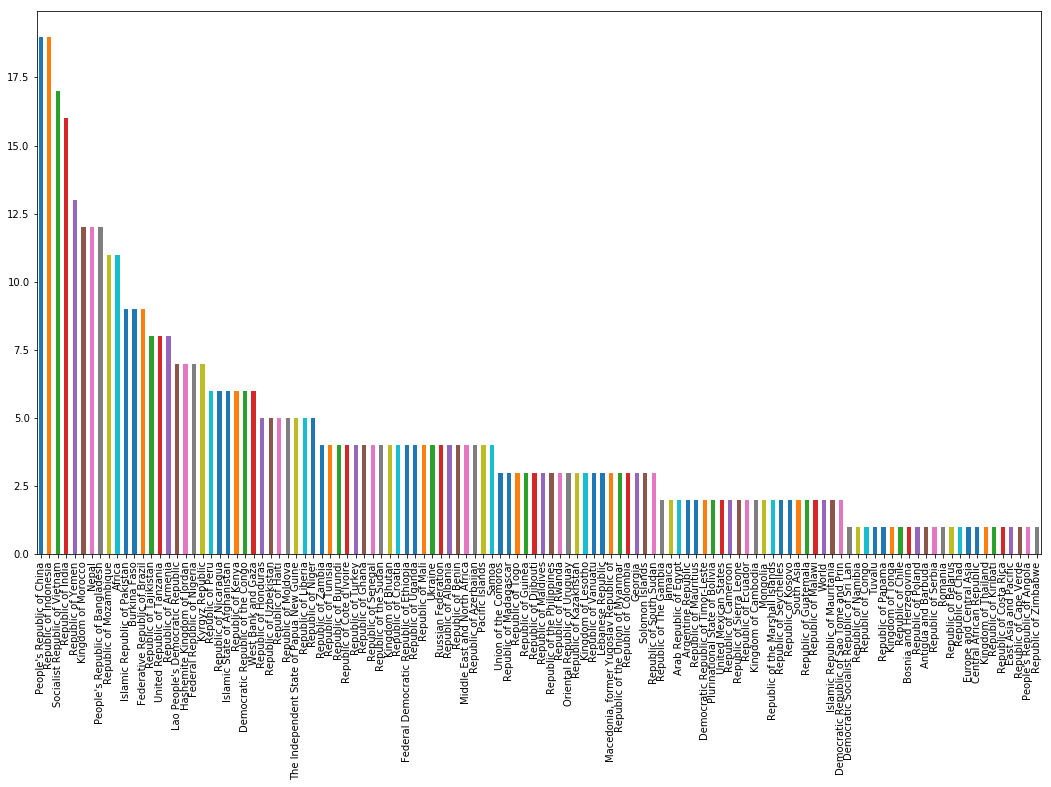

In [8]:
numprojects.plot(kind="bar", figsize=(18,10))

## Question 2 & 3
To start off, we should take a look at how different values of `mjtheme_namecode` are stored.

In [9]:
data.mjtheme_namecode.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [10]:
data.mjtheme_namecode[0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

It would appear that the column has in it a list of dictionaries, with the keys `code` and `name`. We can do a first-pass lookup by collating things in the naïve manner. 

In [11]:
Counter([(x["code"], x["name"]) for x in data.mjtheme_namecode.sum()]).most_common()

[(('11', 'Environment and natural resources management'), 223),
 (('10', 'Rural development'), 202),
 (('8', 'Human development'), 197),
 (('2', 'Public sector governance'), 184),
 (('6', 'Social protection and risk management'), 158),
 (('4', 'Financial and private sector development'), 130),
 (('7', 'Social dev/gender/inclusion'), 119),
 (('5', 'Trade and integration'), 72),
 (('9', 'Urban development'), 47),
 (('1', 'Economic management'), 33),
 (('11', ''), 27),
 (('4', ''), 16),
 (('2', ''), 15),
 (('10', ''), 14),
 (('8', ''), 13),
 (('3', 'Rule of law'), 12),
 (('7', ''), 11),
 (('6', ''), 10),
 (('5', ''), 5),
 (('1', ''), 5),
 (('9', ''), 3),
 (('3', ''), 3)]

We notice that there are entries which does not have a name well-defined. To fix this, we should first find all the unique codes that appear. 

In [12]:
codes_raw = pd.DataFrame(data.mjtheme_namecode.sum()).sort_values(by="code").drop_duplicates().reset_index(drop=True)
codes_lookup = codes_raw[::2].set_index("code") # drop the ones with the name field missing
codes_lookup

,name
code,
1,Economic management
10,Rural development
11,Environment and natural resources management
2,Public sector governance
3,Rule of law
4,Financial and private sector development
5,Trade and integration
6,Social protection and risk management
7,Social dev/gender/inclusion


To fill in the entries without a name, we apply our lookup:

In [14]:
def helper(item):
    code = item["code"]
    return {"code": code, "name": codes_lookup.loc[code,"name"]}

data.mjtheme_namecode = data.mjtheme_namecode.apply(lambda names: [helper(x) for x in names])

To find out which kind of project is most common, we simply flatten the column and use a counter on the now-filled in names of the projects. 

In [15]:
Counter([x["name"] for x in data.mjtheme_namecode.sum()]).most_common()

[('Environment and natural resources management', 250),
 ('Rural development', 216),
 ('Human development', 210),
 ('Public sector governance', 199),
 ('Social protection and risk management', 168),
 ('Financial and private sector development', 146),
 ('Social dev/gender/inclusion', 130),
 ('Trade and integration', 77),
 ('Urban development', 50),
 ('Economic management', 38),
 ('Rule of law', 15)]